In [ ]:
"""
Purpose: To read in all of the saved off validation dataframes and
display the score

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-24 17:04:49,749 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:04:49,751 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:04:49,752 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:04:49,758 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-24 17:04:49,758 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:04:49,770 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-24 17:04:50,226 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:04:50,230 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:04:50,231 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:04:50,232 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:04:50,233 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:04:50,233 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:04:50,234 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:04:50,235 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:04:50,724 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-24 17:04:50,881 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:04:50,883 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:04:50,884 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:04:50,889 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:04:51,388 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su
from pathlib import Path
import pandas_utils as pu

# Displaying he score

In [5]:
"""
Purpose: To read in all of the validation dataframes,
concatenate and then display the overall scores and then the individual scores

Pseudocode:
1) Get the filenames in the validation direction
2) For each filename load up the dataframe
3) concatenate the dataframes into one
4) Display the score

in lower box
5) For each dataframe collected, display the score for the segment_id
"""

'\nPurpose: To read in all of the validation dataframes,\nconcatenate and then display the overall scores and then the individual scores\n\nPseudocode:\n1) Get the filenames in the validation direction\n2) For each filename load up the dataframe\n3) concatenate the dataframes into one\n4) Display the score\n\nin lower box\n5) For each dataframe collected, display the score for the segment_id\n'

In [64]:
1729 + 8417 + 319 + 445

10910

# Inspecting Statistics Before Proofreading

In [ ]:
verbose = True

#1) Get the filenames in the validation direction
data_dir = "./baseline_data/"
val_df_files = [k for k in list(Path(data_dir).iterdir()) if "ipynb" not in str(k)
               #and "864691136105493209" not in str(k)
               ]

#2) For each filename load up the dataframe
val_df = [su.decompress_pickle(k) for k in val_df_files]

if verbose:
    print(f"{len(val_df)} Dataframes loaded")

#3) concatenate the dataframes into one
total_val_df = pu.concat(val_df)

vu.synapse_validation_df_to_score_plot(total_val_df)

54 Dataframes loaded
Segment Id = 864691135113167769
Postsyn counts:
TP:200817
TN:611
FP:800
FN:669
Presyn counts:
TP:2990
TN:60
FP:9042
FN:3


# Inspecting Statistics After Proofreading

54 Dataframes loaded
Segment Id = 864691135113167769
Postsyn counts:
TP:198412
TN:1121
FP:290
FN:3074
Presyn counts:
TP:1739
TN:8417
FP:319
FN:445


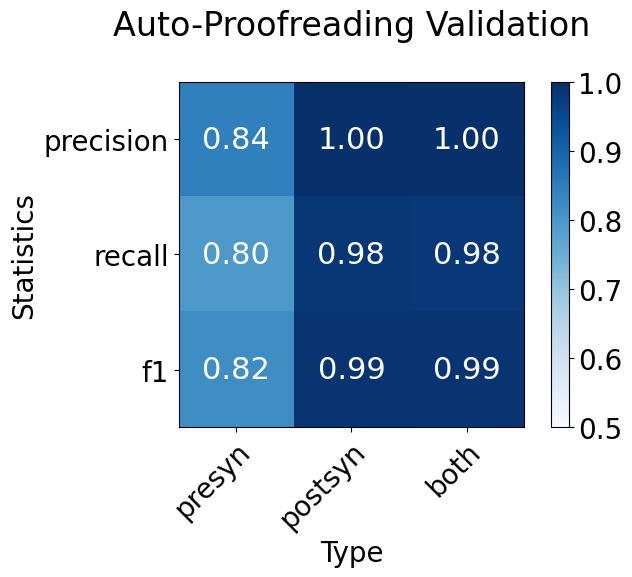

In [63]:
verbose = True

#1) Get the filenames in the validation direction
data_dir = "./validation_data/"
val_df_files = [k for k in list(Path(data_dir).iterdir()) if "ipynb" not in str(k)
               #and "864691136105493209" not in str(k)
               ]

#2) For each filename load up the dataframe
val_df = [su.decompress_pickle(k) for k in val_df_files]

if verbose:
    print(f"{len(val_df)} Dataframes loaded")

#3) concatenate the dataframes into one
total_val_df = pu.concat(val_df)

vu.synapse_validation_df_to_score_plot(total_val_df)

Segment Id = 864691135925564174
Postsyn counts:
TP:1601
TN:0
FP:1
FN:2
Presyn counts:
TP:8
TN:18
FP:1
FN:0


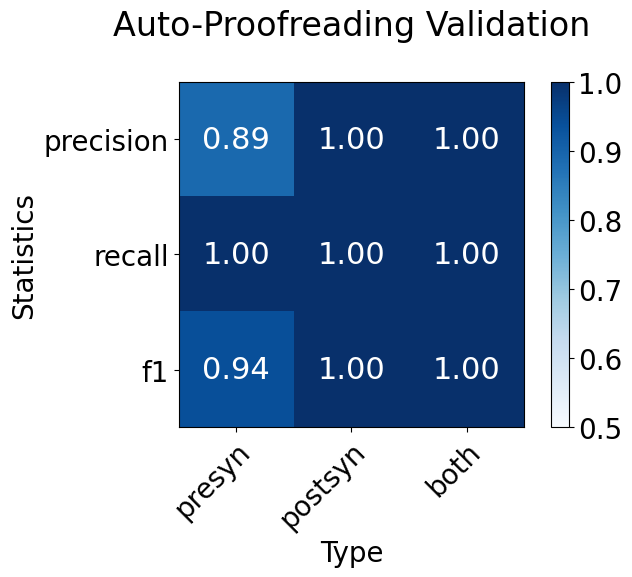

Segment Id = 864691136333790899
Postsyn counts:
TP:3855
TN:0
FP:1
FN:1
Presyn counts:
TP:76
TN:82
FP:25
FN:0


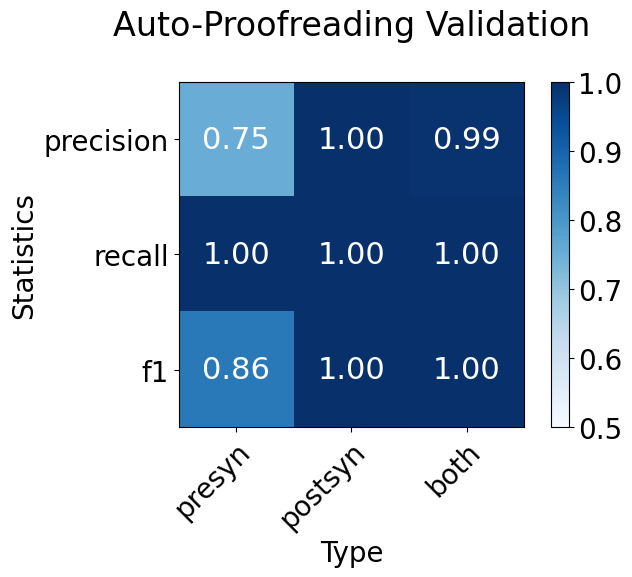

Segment Id = 864691135740225387
Postsyn counts:
TP:2038
TN:25
FP:3
FN:1
Presyn counts:
TP:31
TN:337
FP:2
FN:1


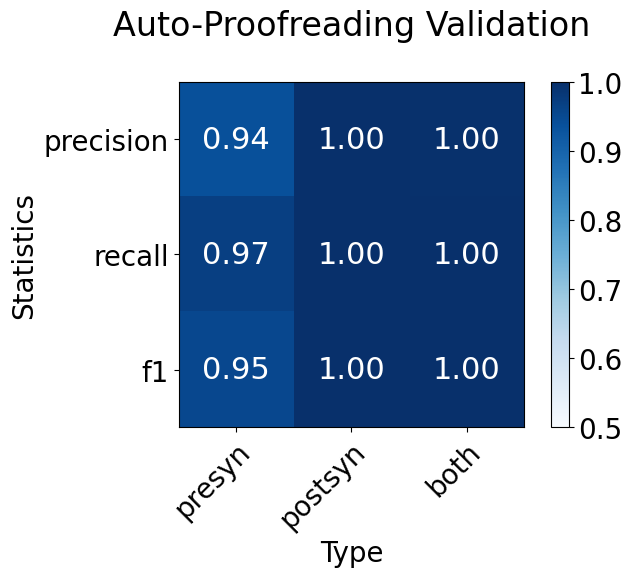

Segment Id = 864691135564655959
Postsyn counts:
TP:1133
TN:0
FP:0
FN:0
Presyn counts:
TP:11
TN:64
FP:5
FN:0


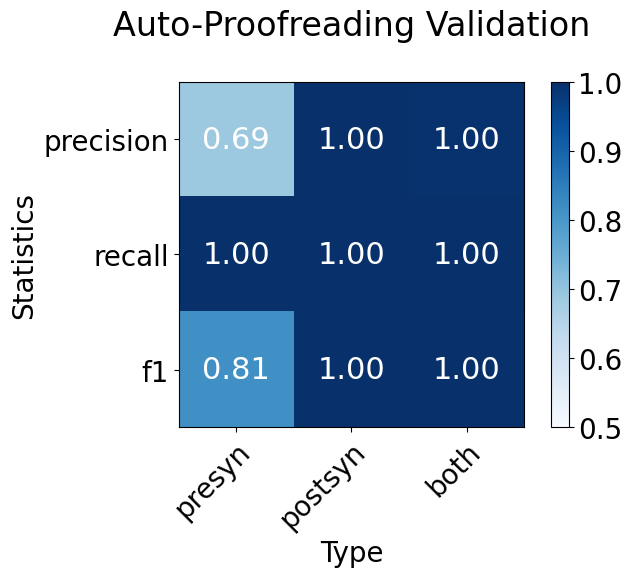

Segment Id = 864691136175008774
Postsyn counts:
TP:2482
TN:0
FP:6
FN:0
Presyn counts:
TP:105
TN:78
FP:82
FN:0


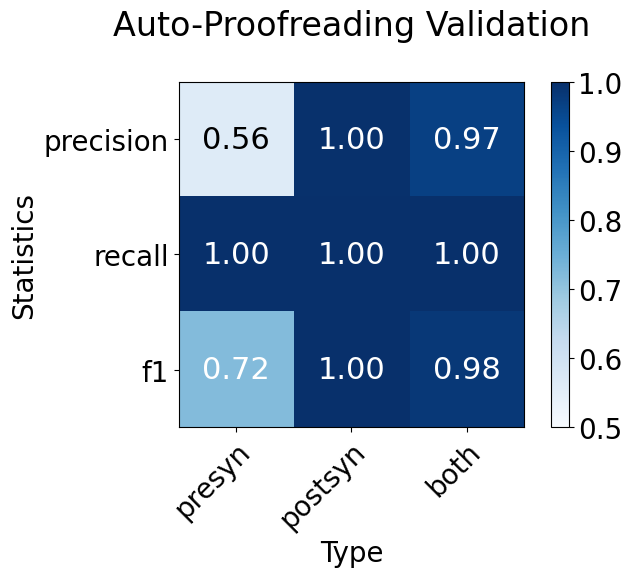

Segment Id = 864691136618412685
Postsyn counts:
TP:1763
TN:0
FP:2
FN:0
Presyn counts:
TP:23
TN:16
FP:4
FN:0


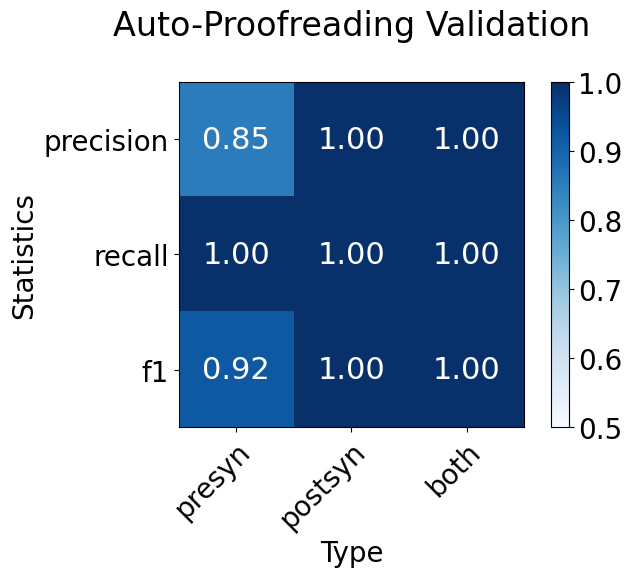

Segment Id = 864691135407289801
Postsyn counts:
TP:3327
TN:0
FP:7
FN:0
Presyn counts:
TP:0
TN:0
FP:0
FN:0


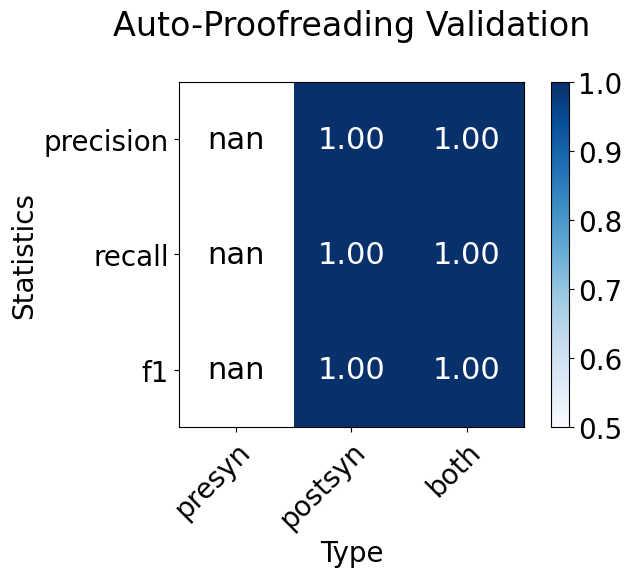

Segment Id = 864691135382947307
Postsyn counts:
TP:2633
TN:0
FP:1
FN:0
Presyn counts:
TP:41
TN:7
FP:13
FN:0


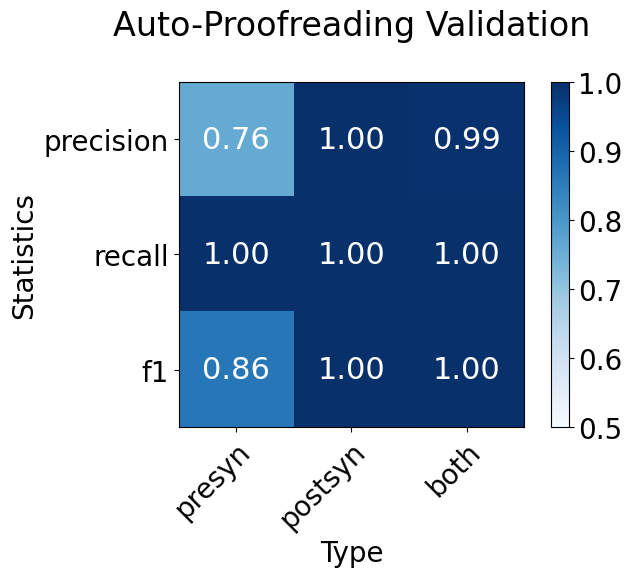

Segment Id = 864691136545546146
Postsyn counts:
TP:2854
TN:0
FP:1
FN:0
Presyn counts:
TP:19
TN:0
FP:0
FN:0


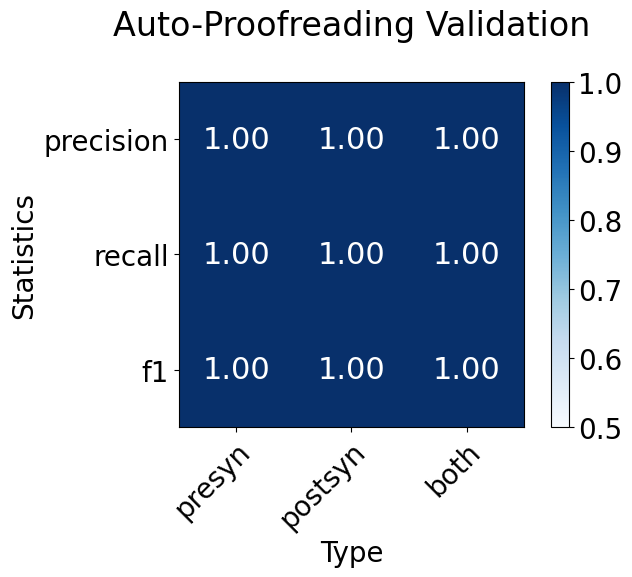

Segment Id = 864691136194103510
Postsyn counts:
TP:2992
TN:2
FP:0
FN:1
Presyn counts:
TP:91
TN:203
FP:38
FN:8


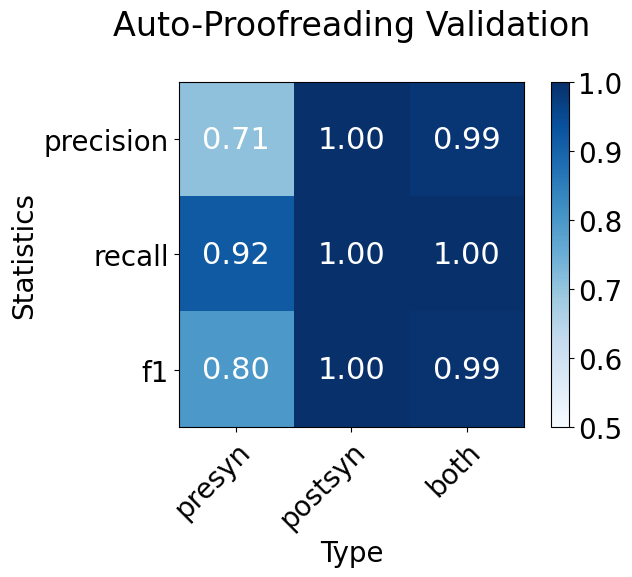

Segment Id = 864691135212690816
Postsyn counts:
TP:2333
TN:2
FP:0
FN:1
Presyn counts:
TP:0
TN:31
FP:0
FN:0


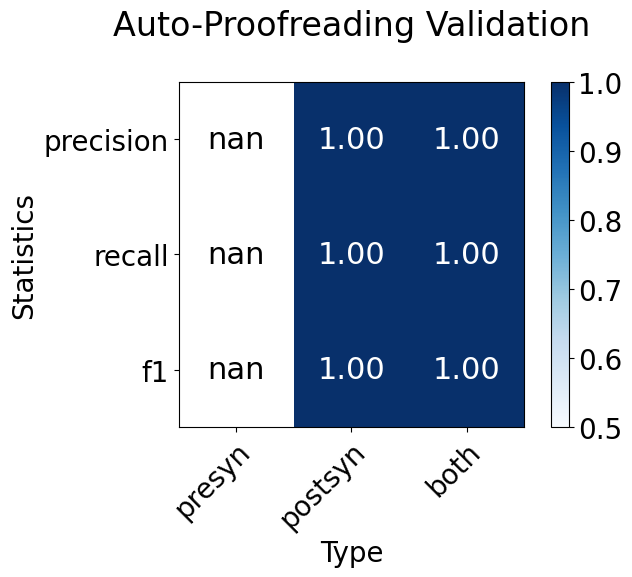

Segment Id = 864691135113167769
Postsyn counts:
TP:2241
TN:3
FP:11
FN:0
Presyn counts:
TP:9
TN:58
FP:21
FN:0


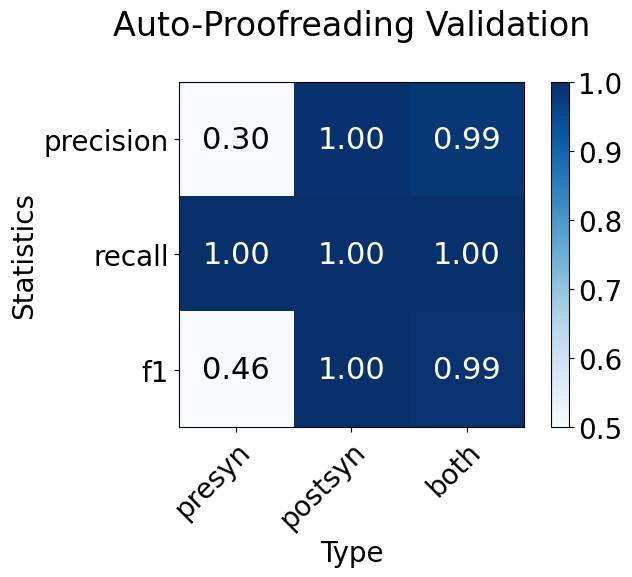

Segment Id = 864691136311740477
Postsyn counts:
TP:3090
TN:0
FP:9
FN:0
Presyn counts:
TP:0
TN:0
FP:0
FN:0


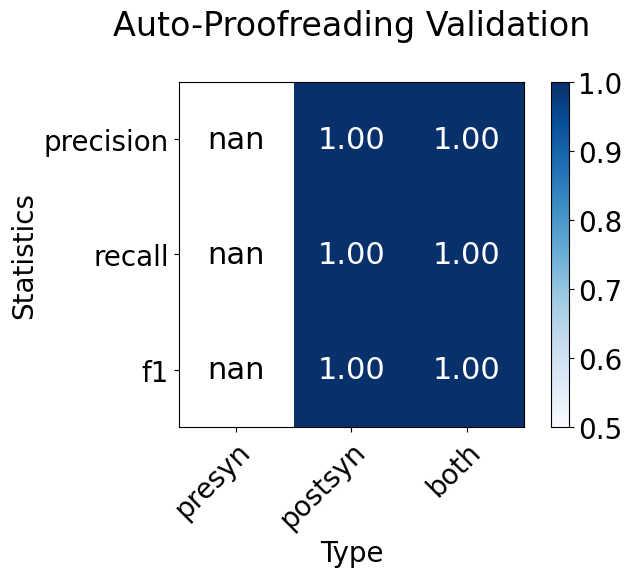

Segment Id = 864691136099807093
Postsyn counts:
TP:4805
TN:0
FP:12
FN:2
Presyn counts:
TP:2
TN:0
FP:0
FN:0


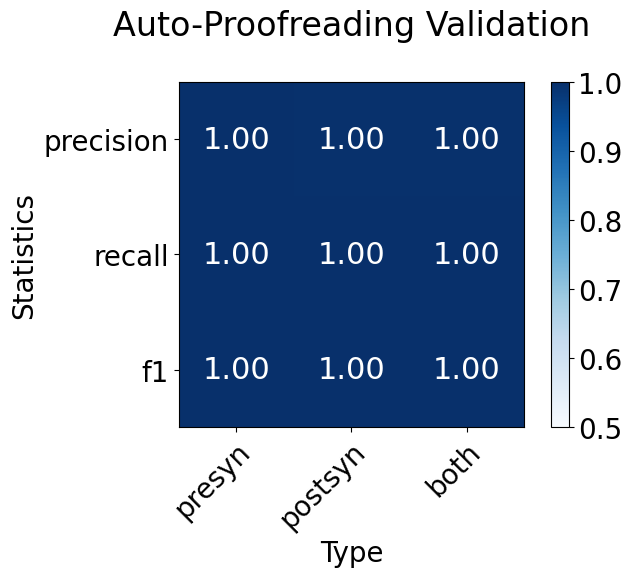

Segment Id = 864691135974454895
Postsyn counts:
TP:4341
TN:0
FP:0
FN:1
Presyn counts:
TP:104
TN:123
FP:14
FN:38


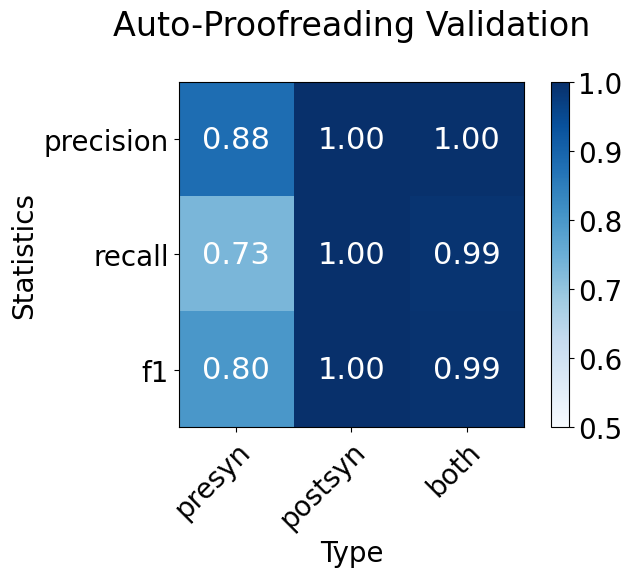

Segment Id = 864691135735426708
Postsyn counts:
TP:2674
TN:776
FP:3
FN:0
Presyn counts:
TP:66
TN:85
FP:5
FN:3


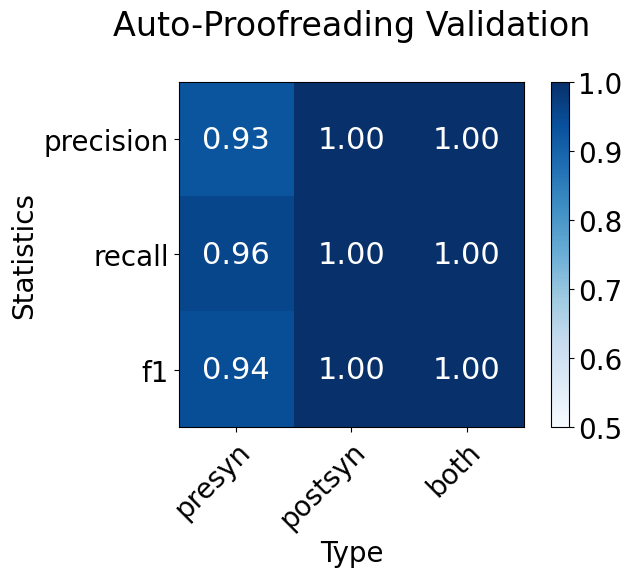

In [26]:
for v in val_df:
    vu.synapse_validation_df_to_score_plot(v)

In [44]:
FP_bad_neurons

[864691136105493209, 864691135771629819, 864691135866394390]

In [43]:
FP_bad_neurons = [864691136333790899,
                 864691135974454383,
                 864691135589907979,
                 864691135771629819,
                 864691135212632448,
                 864691136194103510,
                 864691135866394390]
FP_bad_neurons = []
bad_threshold = 50
for v in val_df:
    s_dict = vu.synapse_validation_df_to_category_counts(v)["presyn"]
    seg_id = vu.validation_df_to_old_segment_id(v)
    FP_score = s_dict['FP']
    FN_score = s_dict['FN']
    #print(f"{seg_id}: FP = {FP_score}, FN = {FN_score}")
    print(f"{seg_id}: {s_dict}")
    if FP_score > bad_threshold or FN_score > bad_threshold:
        FP_bad_neurons.append(seg_id)

864691135491233631: {'TP': 13, 'TN': 140, 'FP': 0, 'FN': 0}
864691136370815112: {'TP': 6, 'TN': 3, 'FP': 4, 'FN': 1}
864691135974454639: {'TP': 2, 'TN': 108, 'FP': 0, 'FN': 0}
864691135925564174: {'TP': 8, 'TN': 82, 'FP': 1, 'FN': 0}
864691135348272855: {'TP': 40, 'TN': 375, 'FP': 12, 'FN': 8}
864691136333790899: {'TP': 72, 'TN': 113, 'FP': 3, 'FN': 4}
864691135740225387: {'TP': 31, 'TN': 401, 'FP': 2, 'FN': 1}
864691136333776819: {'TP': 7, 'TN': 14, 'FP': 0, 'FN': 0}
864691135564655959: {'TP': 6, 'TN': 69, 'FP': 0, 'FN': 5}
864691135272164113: {'TP': 31, 'TN': 153, 'FP': 0, 'FN': 0}
864691136105498585: {'TP': 210, 'TN': 0, 'FP': 4, 'FN': 25}
864691136008573614: {'TP': 8, 'TN': 68, 'FP': 0, 'FN': 37}
864691136175008774: {'TP': 105, 'TN': 145, 'FP': 15, 'FN': 0}
864691135645592260: {'TP': 28, 'TN': 109, 'FP': 4, 'FN': 7}
864691136618412685: {'TP': 23, 'TN': 95, 'FP': 4, 'FN': 0}
864691136535575714: {'TP': 0, 'TN': 50, 'FP': 0, 'FN': 3}
864691135945413668: {'TP': 0, 'TN': 99, 'FP': 0, 'F

In [23]:
FP_bad_neurons

[864691136333790899,
 864691136105498585,
 864691136008573614,
 864691136105493209,
 864691135974454383,
 864691135771629819,
 864691135212632448,
 864691136194103510,
 864691136194042326,
 864691135974454895,
 864691135866394390]